# Introduction to Supervised Learning

So far we have discussed the importance of data visualization and data preprocessing. These steps are important in preparing datasets for statistical analysis and machine learning. We will now start our machine learning section of the course. The main focus of this class is on a field of machine learning called __supervised learning__ and thus we will devote a significant portion of the remaining lecture series on this topic. 

In order to understand what supervised learning is, instead of explaining the theory right from the start, we will dive straight into an example (with accompanying code)

### Supervised learning on the California housing dataset
We will be using the diabetes dataset included in the datasets module in the sklearn package. This module includes several toy datasets that have been very well-studied in the past. It is often a good idea to start learning machine learning using these datasets, and students are encouraged to try out some if not all of these datasets.

In [39]:
import sklearn.datasets
import numpy as np
import pandas as pd

cali_data = sklearn.datasets.fetch_california_housing()

description = cali_data.DESCR
cali_features = pd.DataFrame(cali_data.data)
cali_target = pd.Series(cali_data.target)

cali_features.columns = cali_data.feature_names

So notice that there are three parts of the dataset downloaded here: The __descriptions__, the __data__, and the __target__ variable.

In many cases the target variable is usually part of the data portion, but the sklearn package conveniently has them as separate fields for the downloaded object. So what is the target variable? Let's say it is the variable that is the target of __predictions__. The characteristics of target variables will be discussed in a section later in this lecture. But for now, let's gather some more information from the data.


The convenient part of using the datasets module is that usually datasets obtained using this API provides dataset descriptions. Let's look at this one's description:

In [40]:
print(cali_data.DESCR)
print(cali_data.feature_names)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


So this dataset has 20,640 data points The features available are house age, lat, long, and Population and etc. We know that the target variable is house value. Also judging from this fact, we can reasonably expect to have the target variable be a non-categorical, continuous variable. Let's check that by doing a unique function on the target, and see what's going on. Another way we can see the target variable is a histogram (as we've discussed in lecture 3 as a method of visualization)

[ 0.14999  0.175    0.225   ...,  4.991    5.       5.00001]


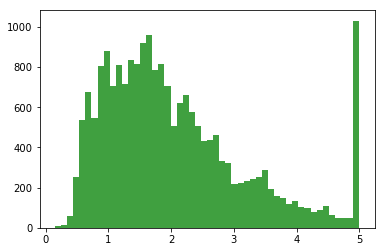

In [23]:
# unique values of target variable
print(np.unique(cali_target))

# histogram of target variable
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(cali_target, 50, facecolor='green', alpha=0.75)
plt.show()


So it seems that the target variable is a continuous variable roughly in the range of [0,5] interval(Although the big jump at 5 seems very suspicious). Why? well there seems to be a continuous distribution of data points along this interval. While this point will be elaborated upon later on, having a continuous target variable makes this a __regression__ problem, as opposed to a __classification__ problem. 

So let's run a simple regression model called __linear regression__. Where do we find this model? Well sklearn, of course! Let's import linear regression.
 

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

So now I'll separate the data into two partitions called a __training set__ and a __validation set__ (often this is denoted as the __test set__, but strictly speaking this isn't the correct term to use). The model will only be trained using the training set and then tested on the validation set, for which we already know the target variable values. This way we simulate and evaluate performance of our model a situation where the model is given new data without a target variable.

In [28]:
# Train, vaplidation split as 80% 20% of the data

index = np.random.rand(len(cali_features)) < 0.8 

train_features = cali_features[index]
valid_features = cali_features[~index]

train_target = cali_target[index]
valid_target = cali_target[~index]

Let's fit the linear regression model we created two cells up to this setup, and then estimate its predictive power on the validation set. We fit using the training set (X corresponds to features and y corresponds to the target variable, and then generating predictions using the features of the validation set.

In [41]:
# linear regression fit
model = model.fit(X=train_features, y=train_target)

# predict on validations using the validation features as input
predictions = model.predict(X=valid_features)

# generate a score for the effectiveness of model
sklearn.metrics.mean_squared_error(y_true = valid_target, y_pred=predictions)

0.5311031958372554

Now there are many different ways to compare the generated predictions, but for simplicity we will use one feature, which is the root mean-squared error, as defined below.

![mean squared error](https://www.researchgate.net/profile/Alexandros_Karatzoglou/publication/221515860/figure/fig1/AS:339586132791298@1457975051470/Figure-1-Mean-Squared-Error-formula-used-to-evaluate-the-user-model.ppm)

To explain, this is the __mean squared difference__ between the __predicted value__ and the __actual value__. Why we use this value will be explained later on, but it is a useful accuracy metric to gauge the effectiveness of a machine learning model. All that matters is that the lower this value - or in other words closer to 0 - the more this model is considered effective. 

So what does this all mean, and why did we do it in this step anyway?


## What is Supervised Learning?

Supervised learning is the process of learning an unknown relationship between a set of feature variables and a target variable.